In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

In [75]:
# read data from data_otherexport.dat into a pandas dataframe starting from line 144
# and take header_line as header for the df

data_file = 'nextmorning.dat'

df = pd.read_csv(data_file, sep='\t', skiprows=8)
df

,Time Relative (sec),Time Absolute (UTC),Time Absolute (Date_Time),Step,Ionizer_State,Pressure_(Torr),Analog_1,1_amu,2_amu,3_amu,...,43_amu,44_amu,45_amu,46_amu,47_amu,48_amu,49_amu,50_amu,Periph:_Digital_In_0,Periph:_Digital_In_1
0,16.318,1.705565e+09,01/18/2024_08:55:47.426,1,2,5.282242e-07,0.008,9.445738e-12,2.762980e-11,8.036035e-15,...,6.144973e-13,8.488035e-12,3.374034e-13,7.339370e-14,3.222277e-14,1.592582e-13,4.684804e-14,1.275229e-13,1,1
1,25.337,1.705565e+09,01/18/2024_08:55:56.445,1,2,3.444934e-07,0.010,2.985163e-12,1.559153e-11,7.080675e-15,...,2.955602e-13,4.131329e-12,1.675498e-13,5.079922e-14,3.054401e-14,6.671404e-14,2.975771e-14,6.514143e-14,1,1
2,34.356,1.705565e+09,01/18/2024_08:56:05.464,1,2,2.817626e-07,0.014,1.756467e-12,1.178077e-11,5.000000e-15,...,1.924127e-13,2.759290e-12,9.494238e-14,3.486869e-14,2.027487e-14,5.546988e-14,1.530542e-14,5.125528e-14,1,1
3,43.375,1.705565e+09,01/18/2024_08:56:14.483,1,2,2.411919e-07,0.012,1.322813e-12,9.914781e-12,3.272208e-14,...,1.647584e-13,2.167556e-12,9.367643e-14,8.440981e-15,8.000651e-15,1.781374e-14,5.327216e-15,3.938994e-14,1,1
4,52.394,1.705565e+09,01/18/2024_08:56:23.502,1,2,2.100344e-07,0.014,1.105250e-12,8.829987e-12,1.871799e-14,...,1.415703e-13,1.848827e-12,7.721907e-14,2.947464e-14,9.754111e-15,2.739879e-14,2.893995e-14,3.428682e-14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1098.598,1.705566e+09,01/18/2024_09:13:49.706,1,2,6.637917e-08,0.012,4.235981e-13,3.731929e-12,1.050503e-14,...,7.196262e-14,6.160856e-13,3.818296e-14,5.000000e-15,6.258988e-15,5.000000e-15,6.258988e-15,1.987779e-14,1,1
121,1107.617,1.705566e+09,01/18/2024_09:13:58.725,1,2,7.524624e-08,0.014,4.028672e-13,3.751567e-12,1.081562e-14,...,5.425111e-14,6.103259e-13,4.421786e-14,8.739779e-15,1.006077e-14,1.757784e-14,2.062871e-14,2.342796e-14,1,1
122,1116.636,1.705566e+09,01/18/2024_09:14:07.744,1,2,7.388571e-08,0.012,4.035631e-13,3.744211e-12,7.737241e-15,...,4.875090e-14,6.011772e-13,4.346694e-14,2.852714e-14,1.874551e-14,3.758537e-14,5.000000e-15,2.207944e-14,1,1
123,1125.655,1.705566e+09,01/18/2024_09:14:16.763,1,2,8.203972e-08,0.012,3.789832e-13,3.733061e-12,1.951609e-14,...,6.776375e-14,6.151892e-13,6.200800e-14,2.766221e-14,5.000000e-15,2.524039e-14,2.149758e-14,8.256202e-15,1,1


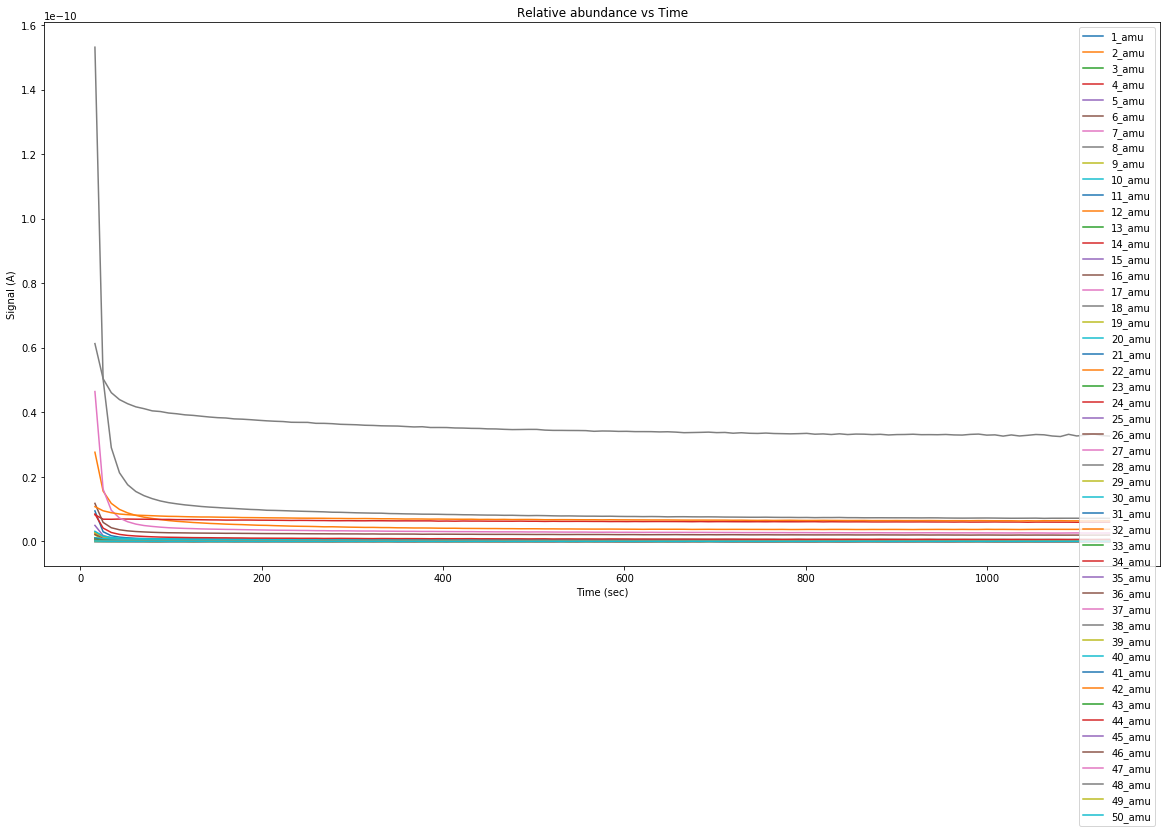

In [76]:
time_list = df['Time Relative (sec)']

material_names = []
# loop over columns
for col in df.columns:
    # check if first char of column name is an integer
    if col[0].isdigit():
        material_names.append(col)
    
materials = {}

for material in material_names:
    materials[material] = df[material]

# plot all materials
for material in materials:
    plt.plot(time_list, materials[material], label=material)

plt.xlabel('Time (sec)')
plt.ylabel('Signal (A)')
plt.title('Relative abundance vs Time')
plt.legend(loc='upper right')
plt.show()

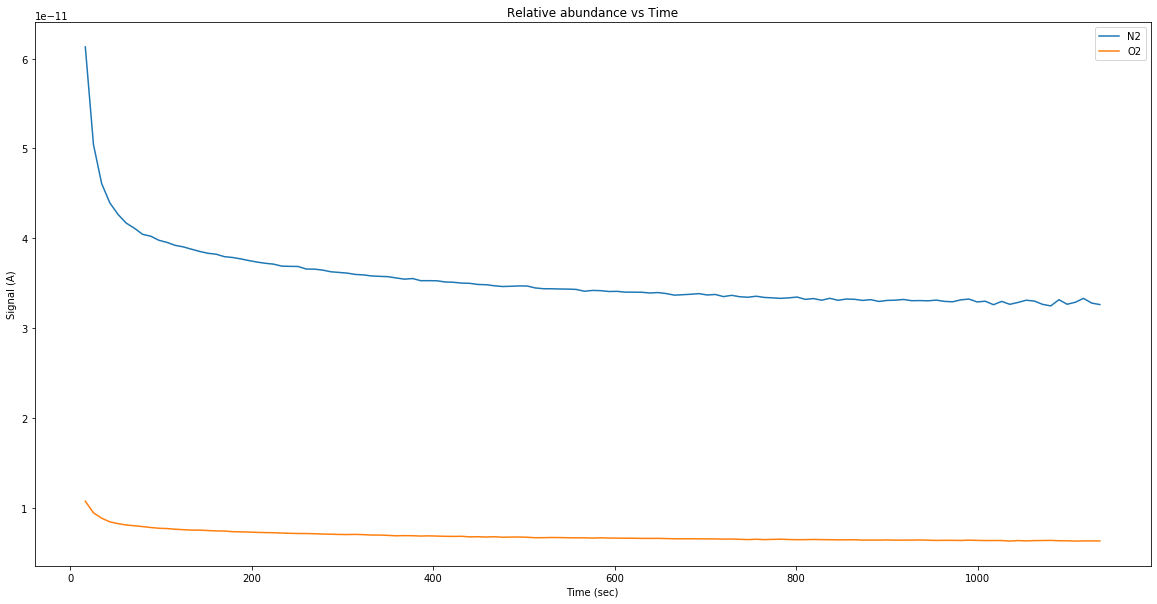

In [77]:
# plot O2 and N2
plt.plot(time_list, materials['28_amu'], label='N2')
plt.plot(time_list, materials['32_amu'], label='O2')

plt.xlabel('Time (sec)')
plt.ylabel('Signal (A)')
plt.title('Relative abundance vs Time')
plt.legend(loc='upper right')
plt.show()

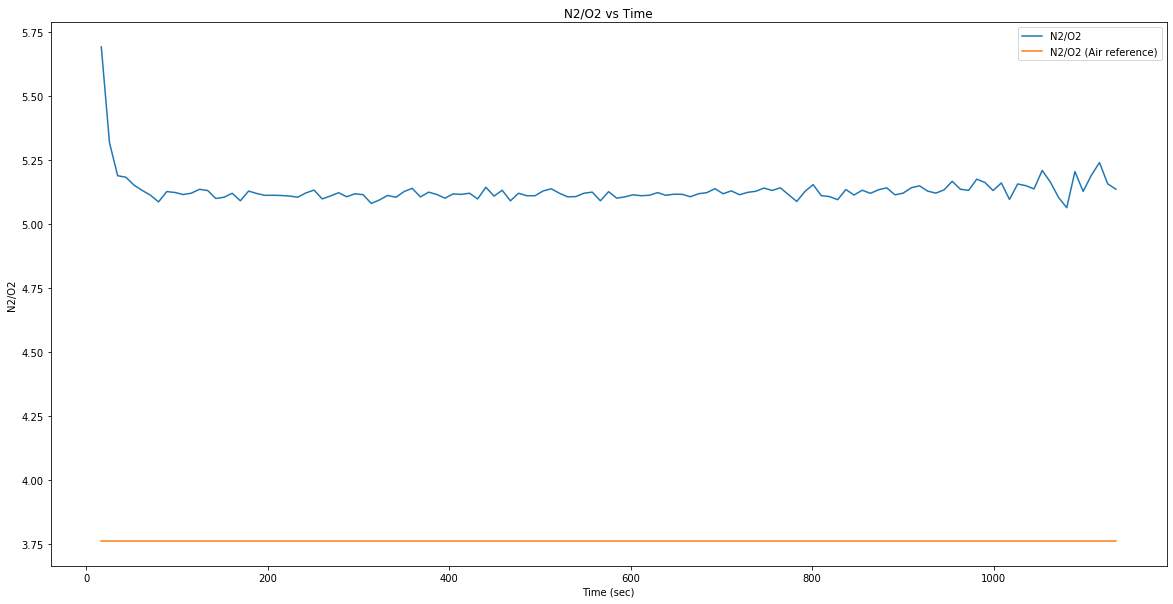

In [78]:
# plot the nitrogen to oxygen ratio and the nitrogen to argon ratio, and also plot the ratios for air
# plt.plot(time_list, materials['28_amu_(Nitrogen)']/materials['32_amu_(Oxygen)'], label='N2/O2')
plt.plot(time_list, materials['28_amu']/materials['32_amu'], label='N2/O2')
plt.plot(time_list, 0.79/0.21*np.ones(len(time_list)), label='N2/O2 (Air reference)')

# plt.plot(time_list, materials['28_amu_(Nitrogen)']/materials['40_amu_(Argon)'], label='N2/Ar')
# plt.plot(time_list, 0.79/0.0009*np.ones(len(time_list)), label='N2/Ar (Air reference)')

plt.xlabel('Time (sec)')
plt.ylabel('N2/O2')
plt.title('N2/O2 vs Time')
plt.legend(loc='upper right')
plt.show()